In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.preprocessing import StandardScaler # feature scaling 
from sklearn import metrics # for evaluation metrics


In [3]:

dataSet= pd.read_csv("AAPL.CSV")
dataSet.head(5)
#seeing the first 5 values of the dataset.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-10,174.139999,175.479996,171.550003,172.119995,171.344833,90865900
1,2022-02-11,172.330002,173.080002,168.039993,168.639999,167.880508,98670700
2,2022-02-14,167.369995,169.580002,166.559998,168.880005,168.119446,86185500
3,2022-02-15,170.970001,172.949997,170.250000,172.789993,172.011810,62527400
4,2022-02-16,171.850006,173.339996,170.050003,172.550003,171.772903,61177400


In [4]:
dataSet["Date"].info
#checking if date is already in datatime object format

<bound method Series.info of 0      2022-02-10
1      2022-02-11
2      2022-02-14
3      2022-02-15
4      2022-02-16
          ...    
246    2023-02-03
247    2023-02-06
248    2023-02-07
249    2023-02-08
250    2023-02-09
Name: Date, Length: 251, dtype: object>

In [5]:
dataSet.shape
#visualising the shape of the dataSet to know more about our data.

(251, 7)

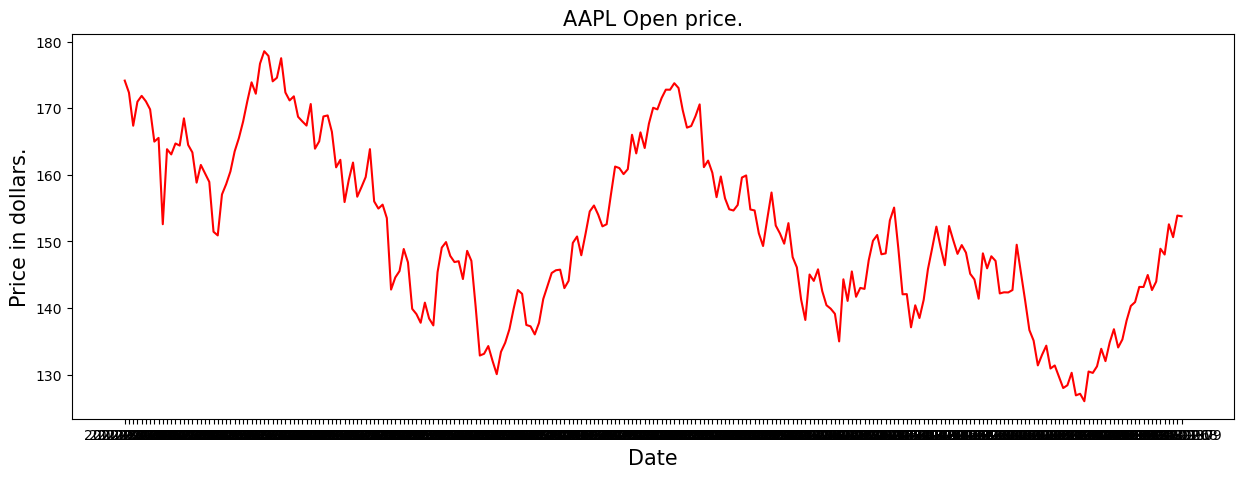

In [6]:
plt.figure(figsize=(15,5))
plt.plot(dataSet['Date'],dataSet['Open'],color='r')
plt.title('AAPL Open price.', fontsize=15)
plt.ylabel('Price in dollars.',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.legend
plt.show()

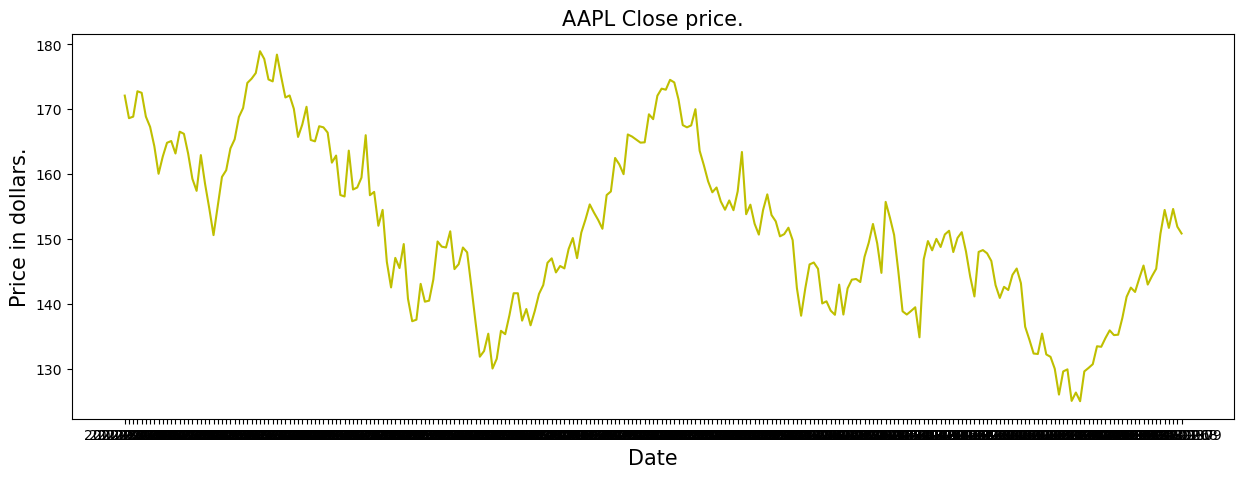

In [7]:
plt.figure(figsize=(15,5))
plt.plot(dataSet['Date'],dataSet['Close'],color='y')
plt.title('AAPL Close price.', fontsize=15)
plt.ylabel('Price in dollars.',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.legend
plt.show()
#visualising the trend of apple stock closing proces for everyday in the dataset.

In [8]:
data_frame=dataSet.drop('Adj Close',axis=1)
data_frame.head(5)
#dropping adjusted close as we would not be making use of it in our algorithm.

,Date,Open,High,Low,Close,Volume
0,2022-02-10,174.139999,175.479996,171.550003,172.119995,90865900
1,2022-02-11,172.330002,173.080002,168.039993,168.639999,98670700
2,2022-02-14,167.369995,169.580002,166.559998,168.880005,86185500
3,2022-02-15,170.970001,172.949997,170.250000,172.789993,62527400
4,2022-02-16,171.850006,173.339996,170.050003,172.550003,61177400


In [9]:
data_frame.isnull().sum()
#this proves that our data has no missing values so we can use to implement machine learning algorithms.

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
data_frame.describe()
#using the describe function to know more information about data.

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.355279,153.488964,149.330996,151.487490,8.548713e+07
std,12.692706,12.579054,12.678830,12.656485,2.314497e+07
min,126.010002,127.769997,124.169998,125.019997,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,6.969695e+07
50%,149.500000,151.570007,147.820007,150.429993,8.054620e+07
75%,161.194999,164.169999,159.355004,162.149994,9.393295e+07
max,178.550003,179.610001,176.699997,178.960007,1.826020e+08


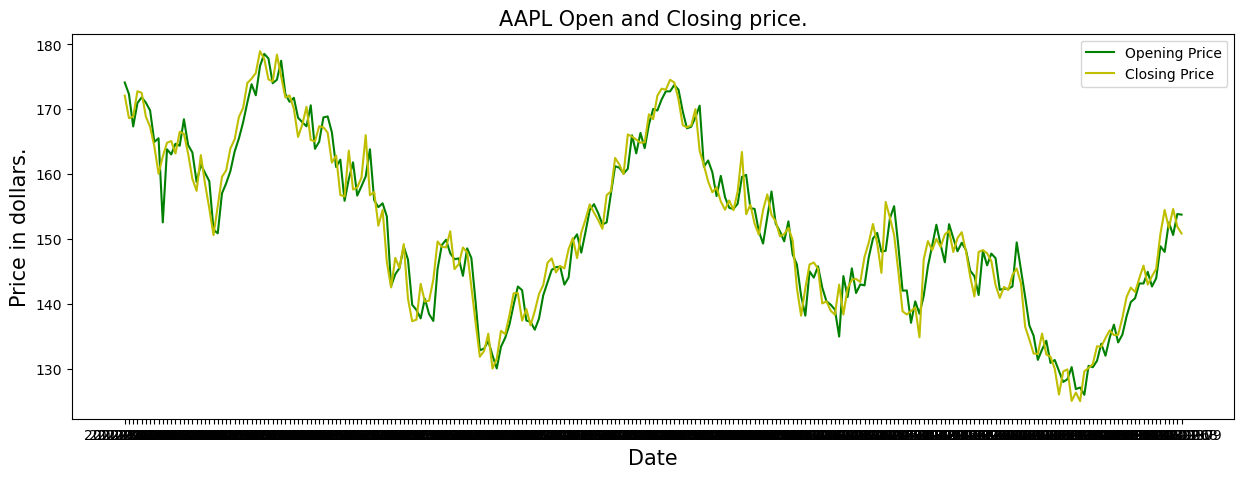

In [11]:
plt.figure(figsize=(15,5))
plt.plot(dataSet['Date'],dataSet['Open'],color='g',label="Opening Price")
plt.plot(dataSet['Date'],dataSet['Close'],color='y',label="Closing Price")
plt.title('AAPL Open and Closing price.', fontsize=15)
plt.ylabel('Price in dollars.',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.legend(loc="best")
plt.show()

In [12]:
x_values=data_frame[['Open','High','Low','Volume']]
y_value=data_frame['Close']


In [13]:
x_df_train,x_df_test,y_df_train, y_df_test = train_test_split(x_values,y_value ,random_state=None,train_size=0.7, shuffle=True)

In [14]:
print("The number of values in training data set are, ",x_df_train.shape)
print("The number of values in testing data set are, ",x_df_test.shape)

The number of values in training data set are,  (175, 4)
The number of values in testing data set are,  (76, 4)


In [15]:
regressor=LinearRegression()


In [16]:
 regressor.fit(x_df_train,y_df_train)

LinearRegression()

In [17]:
print(regressor.coef_)

[-7.79009828e-01  8.08456882e-01  9.70057234e-01  2.77238810e-09]


In [18]:
print(regressor.intercept_)

0.28551707526051473


In [19]:
predicted_value=regressor.predict(x_df_test)

In [20]:
print(x_df_test)

           Open        High         Low     Volume
89   133.419998  137.059998  133.320007   81000500
174  143.020004  145.889999  142.649994   64522000
2    167.369995  169.580002  166.559998   86185500
178  150.960007  151.990005  148.039993   88194300
92   139.899994  141.910004  139.770004   89116800
..          ...         ...         ...        ...
67   146.850006  147.360001  139.899994  109742900
14   168.470001  168.910004  165.550003   76678400
189  141.240005  146.869995  139.500000  118854000
123  164.020004  165.820007  163.250000   63135500
11   163.059998  165.419998  162.429993   95056600

[76 rows x 4 columns]


In [21]:
predicted_dataframe=pd.DataFrame({"Actual Price":y_df_test,"Predicted Price":predicted_value})
predicted_dataframe

,Actual Price,Predicted Price
89,135.869995,136.709728
174,143.389999,145.374841
2,168.880005,168.812436
178,149.350006,149.415328
92,141.660004,141.862136
...,...,...
67,140.820007,141.037377
14,166.229996,166.407746
189,146.869995,144.648717
123,164.919998,165.107527


Text(0.5, 0, 'The Random Test values out of 76 random tests')

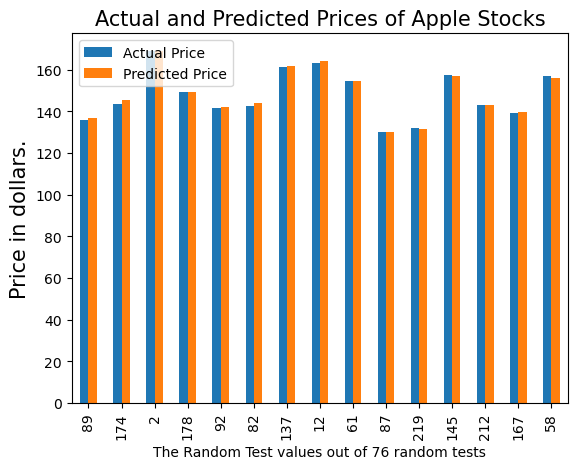

In [22]:
graph=predicted_dataframe.head(15)
graph.plot(kind='bar')
plt.title('Actual and Predicted Prices of Apple Stocks', fontsize=15)
plt.ylabel('Price in dollars.',fontsize=15)
plt.xlabel('The Random Test values out of 76 random tests',fontsize=10)

In [23]:
regressor.score(x_df_test,y_df_test)

0.9929532216372715

In [29]:
import math
print("Mean absolute error =", round(metrics.mean_absolute_error(y_df_test, predicted_value), 2)) 
print("Mean squared error =", round(metrics.mean_squared_error(y_df_test, predicted_value), 2)) 
print("Median absolute error =", round(metrics.median_absolute_error(y_df_test, predicted_value), 2)) 
print("Explain variance score =", round(metrics.explained_variance_score(y_df_test, predicted_value), 2)) 
print("R2 score =", round(metrics.r2_score(y_df_test, predicted_value), 2))

Mean absolute error = 0.73
Mean squared error = 0.98
Median absolute error = 0.49
Explain variance score = 0.99
R2 score = 0.99


In [30]:
MSE = np.square(np.subtract(y_df_test,predicted_value)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

0.9909664859581319